# <font color ='black'>Predicting the sales of products across stores of a retail chain

# <font color ='black'>Table of Contents
* Problem Statement
* About the Dataset
* Importing Required Libraries
* Exploratory data analysis
* Data Cleaning
    * Missing value analysis
    * Coverting Improper Data types to Proper
    * Label Encoding(Converting Categorical to Numerical)
    * Dropping the the unneceassary columns
* Feature Engineering
* Splitting the Features and Target variables
    * Train-Test_Split
    * Data Standardization
* Model Building(using Decision Tree Regressor)
    
* Performance Metrics
    * RMSE

<h2 id="Problem Statement">Problem Statement</h2>
A large Indian retail chain has stores across 3 states in India: Maharashtra, Telangana and 
Kerala. These stores stock products across various categories such as FMCG (fast moving 
consumer goods), eatables / perishables and others. Managing the inventory is crucial for 
the revenue stream of the retail chain. Meeting the demand is important to not lose 
potential revenue, while at the same time stocking excessive products could lead to losses.

# <font clor = "black">understanding the dataset

In [14]:
#import libararies
import pandas as pd # pandas used for data manipulation on dataframe
import numpy as np # numpy used for mathematical operation on array
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from sklearn import model_selection, metrics
%matplotlib inline

<font color ='black'>Reading the dataset

In [15]:
train_df=pd.read_csv('train_data.csv',na_values=['$','#','Null'])
df1=pd.read_csv('product_prices.csv',na_values=['$','#','Null'])
df2=pd.read_csv('date_to_week_id_map.csv',na_values=['$','#','Null'])



In [16]:
print(train_df.shape)
print(df1.shape)
print(df2.shape)

(395000, 7)
(59000, 4)
(821, 2)


In [17]:
#merging the data
df = pd.merge(df1,df2, on=['week_id'], how='inner')
df0 = pd.merge(train_df,df, on=['date','product_identifier','outlet'], how='inner')
print(df0.shape)

(395000, 9)


In [18]:
# Reading first 5 Rows of the data

df0.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88


In [19]:
# Reading last 5 Rows of the data

df0.tail()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98
394999,2014-02-28,3021,33,drinks_and_food,333,Kerala,0,161,2.08


In [20]:
#Reading the name of the columns

df0.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales', 'week_id',
       'sell_price'],
      dtype='object')

In [21]:
#Checking the datatypes of features

df0.dtypes

date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
week_id                    int64
sell_price               float64
dtype: object

In [22]:
#value count for target varibale
df0['state'].value_counts()

Maharashtra    158000
Telangana      118500
Kerala         118500
Name: state, dtype: int64

In [23]:
#Checking the info of data

df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   395000 non-null  object 
 1   product_identifier     395000 non-null  int64  
 2   department_identifier  395000 non-null  int64  
 3   category_of_product    395000 non-null  object 
 4   outlet                 395000 non-null  int64  
 5   state                  395000 non-null  object 
 6   sales                  395000 non-null  int64  
 7   week_id                395000 non-null  int64  
 8   sell_price             395000 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 30.1+ MB


In [24]:
#Descriptive statistics of data

df0.describe()

,product_identifier,department_identifier,outlet,sales,week_id,sell_price
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,105.070886,4.987644
std,809.799518,6.337863,91.161291,3.595266,32.578749,3.874444
min,74.000000,11.000000,111.000000,0.000000,49.000000,0.050000
25%,926.000000,21.000000,113.000000,0.000000,77.000000,2.680000
50%,1325.000000,22.000000,221.500000,0.000000,105.000000,3.980000
75%,1753.000000,31.000000,331.000000,1.000000,133.000000,6.480000
max,3021.000000,33.000000,333.000000,293.000000,161.000000,44.360000


In [25]:
# Checking for null values

df0.isnull().sum()

date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
week_id                  0
sell_price               0
dtype: int64

# <font color>Feature engineering

In [26]:
import datetime
df0['month']=pd. to_datetime(df0['date']).dt.month # Extracting by Month
df0['day']=pd. to_datetime(df0['date']).dt.day    # Extracting by Day

In [27]:
#Checking the n unique values

df0.nunique()

date                     790
product_identifier        50
department_identifier      6
category_of_product        3
outlet                    10
state                      3
sales                    126
week_id                  113
sell_price               107
month                     12
day                       31
dtype: int64

<AxesSubplot:>

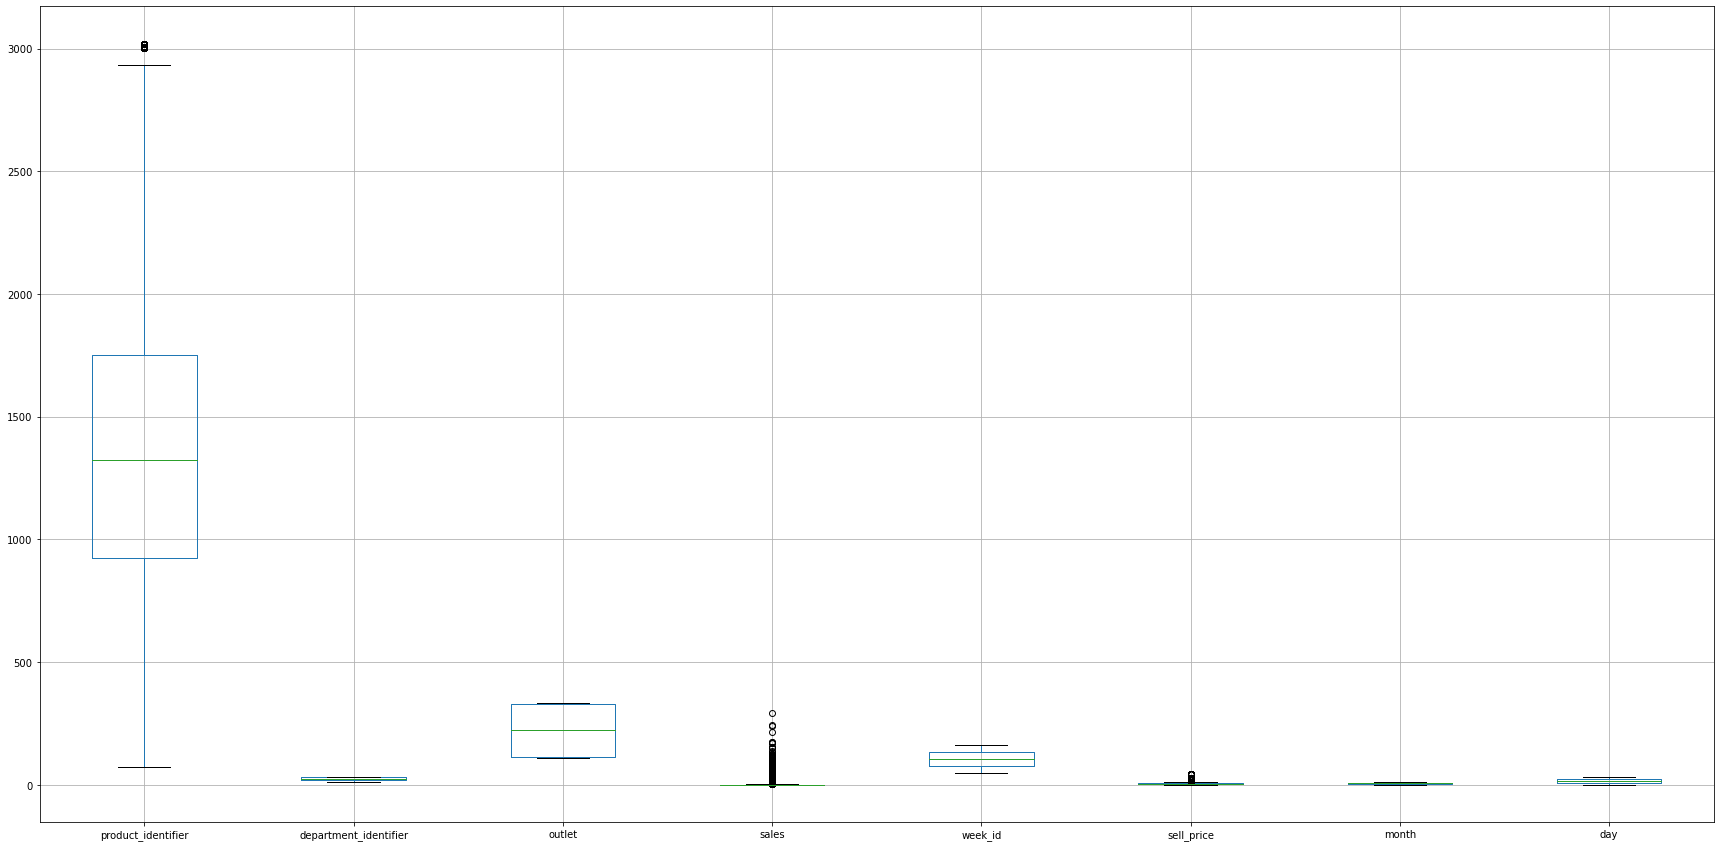

In [28]:
#Checking Outliers

df0.boxplot(figsize=(30,15))

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_identifier'>

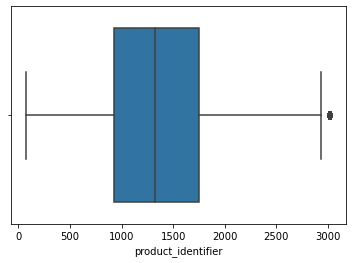

In [29]:
#Visualization using seaborn

sns.boxplot(df0['product_identifier'])

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='department_identifier'>

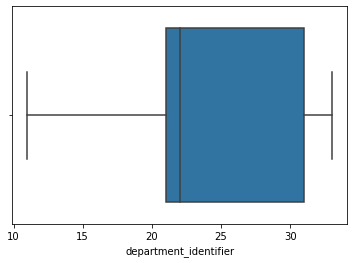

In [30]:

sns.boxplot(df0['department_identifier'])

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='outlet'>

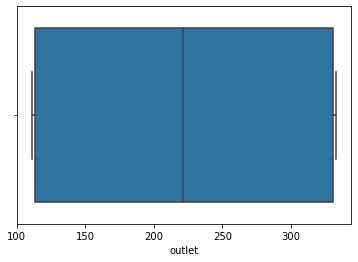

In [31]:

sns.boxplot(df0['outlet'])

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales'>

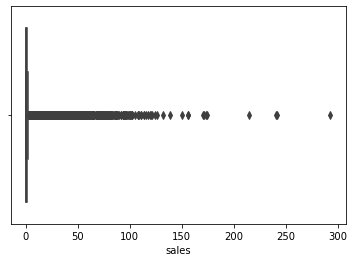

In [32]:

sns.boxplot(df0['sales'])

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week_id'>

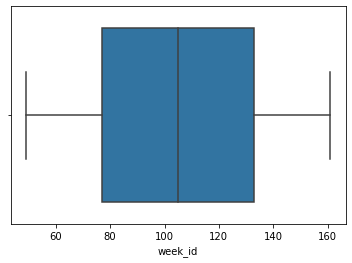

In [33]:

sns.boxplot(df0['week_id'])

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sell_price'>

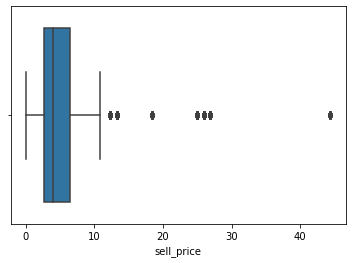

In [34]:

sns.boxplot(df0['sell_price'])

# <font color ='black'>Data Visualization

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

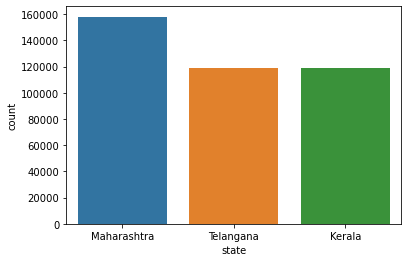

In [36]:
sns.countplot(df0['state'])

# <font color='black'>observation:we can infer from the above graph that maharastra as higest sales as compare to others

In [37]:
##Converting Categoricalto numerical Features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
a=encoder.fit_transform(df0['category_of_product'])
df0['category_of_product']=a
df0.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price,month,day
0,2012-01-01,74,11,2,111,Maharashtra,0,49,2.94,1,1
1,2012-01-01,337,11,2,111,Maharashtra,1,49,7.44,1,1
2,2012-01-01,423,12,2,111,Maharashtra,0,49,0.97,1,1
3,2012-01-01,432,12,2,111,Maharashtra,0,49,4.97,1,1
4,2012-01-01,581,21,1,111,Maharashtra,0,49,4.88,1,1


In [38]:
encoder = LabelEncoder()
a=encoder.fit_transform(df0['state'])
df0[ 'state']=a
df0.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price,month,day
0,2012-01-01,74,11,2,111,1,0,49,2.94,1,1
1,2012-01-01,337,11,2,111,1,1,49,7.44,1,1
2,2012-01-01,423,12,2,111,1,0,49,0.97,1,1
3,2012-01-01,432,12,2,111,1,0,49,4.97,1,1
4,2012-01-01,581,21,1,111,1,0,49,4.88,1,1


In [39]:
#checking for corellation
df0.corr()


,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price,month,day
product_identifier,1.000000e+00,9.099899e-01,-8.666329e-01,2.286007e-17,-9.635623e-18,0.152893,1.159105e-14,-0.201074,3.090176e-15,1.049793e-15
department_identifier,9.099899e-01,1.000000e+00,-9.941635e-01,6.817693e-18,-1.802770e-18,0.190038,-1.973939e-14,-0.302860,1.808373e-16,1.753639e-16
category_of_product,-8.666329e-01,-9.941635e-01,1.000000e+00,-1.617740e-17,-1.024457e-18,-0.198067,-5.343718e-15,0.318165,-1.124563e-15,-1.693227e-16
outlet,2.286007e-17,6.817693e-18,-1.617740e-17,1.000000e+00,-4.673351e-01,-0.021005,2.327934e-14,-0.000140,1.284597e-14,8.393183e-16
state,-9.635623e-18,-1.802770e-18,-1.024457e-18,-4.673351e-01,1.000000e+00,-0.009878,-1.181096e-14,-0.000481,-5.188957e-15,-6.228323e-16
sales,1.528933e-01,1.900381e-01,-1.980666e-01,-2.100456e-02,-9.877942e-03,1.000000,-1.896909e-02,-0.198098,5.262983e-03,-2.192815e-02
week_id,1.159105e-14,-1.973939e-14,-5.343718e-15,2.327934e-14,-1.181096e-14,-0.018969,1.000000e+00,0.004532,2.447021e-01,3.415249e-02
sell_price,-2.010739e-01,-3.028601e-01,3.181653e-01,-1.403172e-04,-4.812453e-04,-0.198098,4.531863e-03,1.000000,5.675647e-04,1.406005e-04
month,3.090176e-15,1.808373e-16,-1.124563e-15,1.284597e-14,-5.188957e-15,0.005263,2.447021e-01,0.000568,1.000000e+00,1.229825e-02
day,1.049793e-15,1.753639e-16,-1.693227e-16,8.393183e-16,-6.228323e-16,-0.021928,3.415249e-02,0.000141,1.229825e-02,1.000000e+00


<AxesSubplot:>

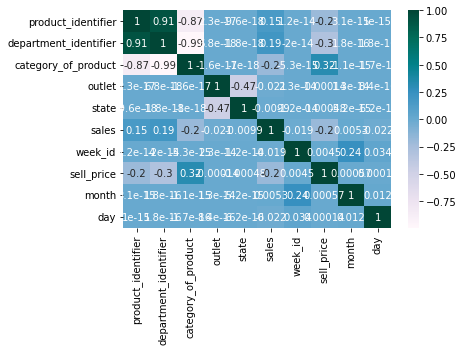

In [40]:
sns.heatmap(df0.corr(), annot =True, cmap='PuBuGn')

In [42]:
# creating Function for checking correlated variables

def correlation(x_train,threshold):
  col_corr=set()
  corr_matrix=x_train.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j] )>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr 

In [43]:
# Fixing thrshold value percentage as 0.9:
corr_features=correlation(df0,0.9)
len(set(corr_features))
print('correlated features:',len(set(corr_features)))

correlated features: 2


In [44]:
print('correlated features are:' , corr_features)   # finding Correlated features

correlated features are: {'category_of_product', 'department_identifier'}


In [45]:
# Dropping Correlated features in train 
df3=df0.drop(['date','department_identifier'],axis=1)


In [46]:
df3

,product_identifier,category_of_product,outlet,state,sales,week_id,sell_price,month,day
0,74,2,111,1,0,49,2.94,1,1
1,337,2,111,1,1,49,7.44,1,1
2,423,2,111,1,0,49,0.97,1,1
3,432,2,111,1,0,49,4.97,1,1
4,581,1,111,1,0,49,4.88,1,1
...,...,...,...,...,...,...,...,...,...
394995,2932,0,333,0,2,161,2.78,2,28
394996,2935,0,333,0,8,161,0.20,2,28
394997,3004,0,333,0,0,161,2.50,2,28
394998,3008,0,333,0,0,161,1.98,2,28


In [47]:
df3.shape



(395000, 9)

# <font color>Feature scaling

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df3)

df_num_ss = scaler.transform(df3)

# <font color>splitting the Feature and Target variable

In [49]:
from sklearn.model_selection import train_test_split
X=df3.drop('sales',axis=1)
y=df3['sales']

# <font color>Model Building

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 , random_state=42)

In [51]:
X_train

,product_identifier,category_of_product,outlet,state,week_id,sell_price,month,day
38988,2294,0,333,0,60,2.97,3,18
154040,2492,0,111,1,93,1.98,11,4
292537,1753,0,111,1,132,1.97,8,8
212138,2294,0,113,1,109,2.97,2,28
223329,1508,1,223,2,112,5.94,3,22
...,...,...,...,...,...,...,...,...
259178,1472,1,114,1,123,3.82,6,2
365838,2294,0,223,2,153,2.97,1,1
131932,1599,1,332,0,86,6.94,9,20
146867,1173,1,331,0,91,8.97,10,20


In [52]:
X_test

,product_identifier,category_of_product,outlet,state,week_id,sell_price,month,day
241974,1322,1,333,0,118,6.97,4,28
370274,1322,1,222,2,154,6.97,1,10
170348,3008,0,223,2,97,1.76,12,6
578,1472,1,112,1,49,4.00,1,2
13102,423,2,113,1,52,0.97,1,27
...,...,...,...,...,...,...,...,...
111442,2794,0,332,0,80,4.38,8,10
140266,1135,1,222,2,89,5.94,10,7
63210,868,1,221,2,67,5.92,5,6
247437,1753,0,332,0,119,1.97,5,9


In [53]:
y_test

241974    0
370274    1
170348    3
578       0
13102     0
         ..
111442    0
140266    0
63210     2
247437    0
313546    0
Name: sales, Length: 79000, dtype: int64

In [54]:
y_train

38988     0
154040    0
292537    0
212138    0
223329    0
         ..
259178    1
365838    4
131932    0
146867    0
121958    0
Name: sales, Length: 316000, dtype: int64

In [55]:
len(y_train)

316000

In [56]:
len(y_test)

79000

In [57]:
X_train.dtypes

product_identifier       int64
category_of_product      int32
outlet                   int64
state                    int32
week_id                  int64
sell_price             float64
month                    int64
day                      int64
dtype: object

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
Regressor=RandomForestRegressor()

In [60]:
Regressor.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
y_pred=Regressor.predict(X_test)

# <font color='black'>Performance Metrics

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(y_test,y_pred)

0.5037298193761064

In [64]:
import math 
MSE = np.square(np.subtract(y_test,y_pred)).mean()   
   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:\n")  
print(rsme)  

Root Mean Square Error:

2.6164118956301583


# <font color='black'>Data preprocessing on test data

In [65]:
test_df=pd.read_csv('test_data.csv',na_values=['$','#','Null'])
df4=pd.read_csv('product_prices.csv',na_values=['$','#','Null'])
df5=pd.read_csv('date_to_week_id_map.csv',na_values=['$','#','Null'])

In [66]:
test_df

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra
2,3,2014-03-01,423,12,others,111,Maharashtra
3,4,2014-03-01,432,12,others,111,Maharashtra
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra
...,...,...,...,...,...,...,...
15495,15496,2014-03-31,2932,33,drinks_and_food,333,Kerala
15496,15497,2014-03-31,2935,33,drinks_and_food,333,Kerala
15497,15498,2014-03-31,3004,33,drinks_and_food,333,Kerala
15498,15499,2014-03-31,3008,33,drinks_and_food,333,Kerala


In [67]:
df4

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94
...,...,...,...,...
58995,333,3021,162,2.08
58996,333,3021,163,2.08
58997,333,3021,164,2.08
58998,333,3021,165,2.08


In [68]:
df5

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49
...,...,...
816,2014-03-27,165
817,2014-03-28,165
818,2014-03-29,166
819,2014-03-30,166


In [69]:
print(test_df.shape)
print(df4.shape)
print(df5.shape)

(15500, 7)
(59000, 4)
(821, 2)


In [70]:
#merging the data
test_df1 = pd.merge(df4,df5, on=['week_id'], how='inner')

In [71]:
test_df2 = pd.merge(test_df,test_df1, on=['date','product_identifier','outlet'], how='inner')

In [72]:
test_df2

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price
0,1,2014-03-01,74,11,others,111,Maharashtra,162,3.43
1,2,2014-03-01,337,11,others,111,Maharashtra,162,7.78
2,3,2014-03-01,423,12,others,111,Maharashtra,162,0.97
3,4,2014-03-01,432,12,others,111,Maharashtra,162,4.97
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra,162,4.88
...,...,...,...,...,...,...,...,...,...
15495,15496,2014-03-31,2932,33,drinks_and_food,333,Kerala,166,2.78
15496,15497,2014-03-31,2935,33,drinks_and_food,333,Kerala,166,0.20
15497,15498,2014-03-31,3004,33,drinks_and_food,333,Kerala,166,2.68
15498,15499,2014-03-31,3008,33,drinks_and_food,333,Kerala,166,1.98


In [73]:
test_df2.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price
0,1,2014-03-01,74,11,others,111,Maharashtra,162,3.43
1,2,2014-03-01,337,11,others,111,Maharashtra,162,7.78
2,3,2014-03-01,423,12,others,111,Maharashtra,162,0.97
3,4,2014-03-01,432,12,others,111,Maharashtra,162,4.97
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra,162,4.88


In [74]:
test_df2.tail()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price
15495,15496,2014-03-31,2932,33,drinks_and_food,333,Kerala,166,2.78
15496,15497,2014-03-31,2935,33,drinks_and_food,333,Kerala,166,0.20
15497,15498,2014-03-31,3004,33,drinks_and_food,333,Kerala,166,2.68
15498,15499,2014-03-31,3008,33,drinks_and_food,333,Kerala,166,1.98
15499,15500,2014-03-31,3021,33,drinks_and_food,333,Kerala,166,2.08


In [75]:
test_df2.columns

Index(['id', 'date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'week_id', 'sell_price'],
      dtype='object')

In [76]:
import datetime
test_df2['month']=pd. to_datetime(test_df2['date']).dt.month # Extracting by Month
test_df2['day']=pd. to_datetime(test_df2['date']).dt.day    # Extracting by Day

In [77]:
##Converting Categorical Features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
a=encoder.fit_transform(test_df2['category_of_product'])
test_df2[ 'category_of_product']=a
test_df2.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price,month,day
0,1,2014-03-01,74,11,2,111,Maharashtra,162,3.43,3,1
1,2,2014-03-01,337,11,2,111,Maharashtra,162,7.78,3,1
2,3,2014-03-01,423,12,2,111,Maharashtra,162,0.97,3,1
3,4,2014-03-01,432,12,2,111,Maharashtra,162,4.97,3,1
4,5,2014-03-01,581,21,1,111,Maharashtra,162,4.88,3,1


In [78]:
encoder = LabelEncoder()
a=encoder.fit_transform(test_df2['state'])
test_df2[ 'state']=a
test_df2.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price,month,day
0,1,2014-03-01,74,11,2,111,1,162,3.43,3,1
1,2,2014-03-01,337,11,2,111,1,162,7.78,3,1
2,3,2014-03-01,423,12,2,111,1,162,0.97,3,1
3,4,2014-03-01,432,12,2,111,1,162,4.97,3,1
4,5,2014-03-01,581,21,1,111,1,162,4.88,3,1


In [79]:
test_df3=test_df2.drop(['id','date','department_identifier'],axis=1)

In [80]:
test_df3

,product_identifier,category_of_product,outlet,state,week_id,sell_price,month,day
0,74,2,111,1,162,3.43,3,1
1,337,2,111,1,162,7.78,3,1
2,423,2,111,1,162,0.97,3,1
3,432,2,111,1,162,4.97,3,1
4,581,1,111,1,162,4.88,3,1
...,...,...,...,...,...,...,...,...
15495,2932,0,333,0,166,2.78,3,31
15496,2935,0,333,0,166,0.20,3,31
15497,3004,0,333,0,166,2.68,3,31
15498,3008,0,333,0,166,1.98,3,31


In [81]:
test_df3

,product_identifier,category_of_product,outlet,state,week_id,sell_price,month,day
0,74,2,111,1,162,3.43,3,1
1,337,2,111,1,162,7.78,3,1
2,423,2,111,1,162,0.97,3,1
3,432,2,111,1,162,4.97,3,1
4,581,1,111,1,162,4.88,3,1
...,...,...,...,...,...,...,...,...
15495,2932,0,333,0,166,2.78,3,31
15496,2935,0,333,0,166,0.20,3,31
15497,3004,0,333,0,166,2.68,3,31
15498,3008,0,333,0,166,1.98,3,31


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test_df3)

df_num_ss = scaler.transform(test_df3)

In [83]:
df_num_ss

array([[-1.77323126,  2.12252393, -1.09915212, ..., -0.40165051,
         0.        , -1.67705098],
       [-1.44845911,  2.12252393, -1.09915212, ...,  0.71960939,
         0.        , -1.67705098],
       [-1.34225985,  2.12252393, -1.09915212, ..., -1.03574232,
         0.        , -1.67705098],
       ...,
       [ 1.8449528 , -1.24656167,  1.33609509, ..., -0.59497118,
         0.        ,  1.67705098],
       [ 1.84989231, -1.24656167,  1.33609509, ..., -0.77540381,
         0.        ,  1.67705098],
       [ 1.86594568, -1.24656167,  1.33609509, ..., -0.74962772,
         0.        ,  1.67705098]])

In [84]:
prediction=Regressor.predict(df_num_ss)

C:\Users\pooja\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [85]:
prediction

array([0.87, 0.46, 0.87, ..., 1.03, 1.03, 1.03])

In [87]:
##Converting prediction values into csv file
id_frame = pd.read_csv("test_data.csv")
ID_info = id_frame[["id"]]
ID_info.head()
prediction = pd.DataFrame(prediction,columns=["sales"])
ID_info["sales"] = prediction["sales"]
ID_info.to_csv('pooja_A_122_MiTH.csv',index=False)

C:\Users\pooja\AppData\Local\Temp\ipykernel_14000\1600320669.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ID_info["sales"] = prediction["sales"]


In [88]:
ID_info

,id,sales
0,1,0.87
1,2,0.46
2,3,0.87
3,4,0.87
4,5,0.87
...,...,...
15495,15496,1.03
15496,15497,1.03
15497,15498,1.03
15498,15499,1.03
